In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
%matplotlib inline

In [3]:
education_df = pd.read_csv('states_all.csv')
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [8]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] ==
                                                                                  state, fill_list].interpolate()
education_df.dropna(inplace=True)

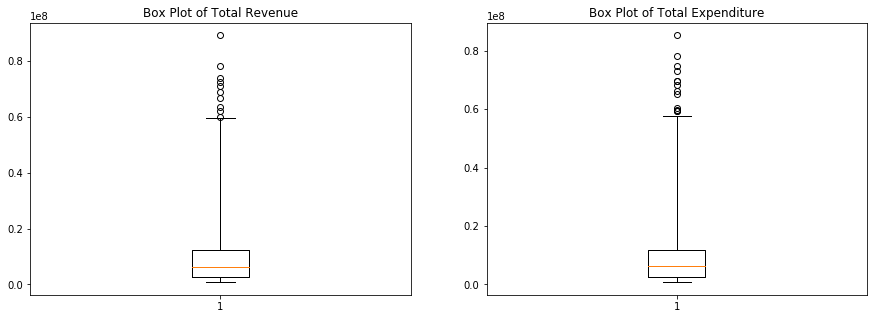

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis=5)
plt.title("Box Plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box Plot of Total Expenditure")
plt.show()

In [11]:
winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

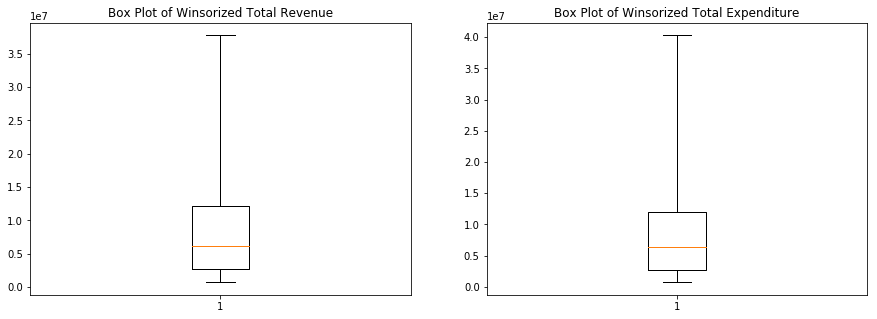

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis=5)
plt.title("Box Plot of Winsorized Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box Plot of Winsorized Total Expenditure")
plt.show()

In [13]:
budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

Text(0.5,1,'Box Plot of Budget Deficit')

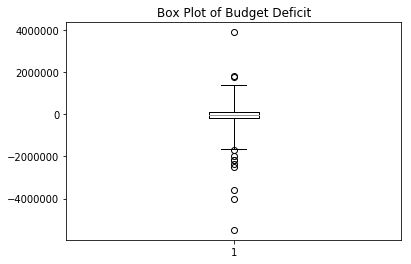

In [14]:
plt.boxplot(budget_deficit, whis=5)
plt.title("Box Plot of Budget Deficit")

In [15]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))

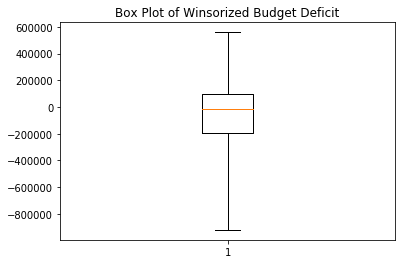

In [16]:
plt.boxplot(winsorized_budget, whis=5)
plt.title("Box Plot of Winsorized Budget Deficit")
plt.show()

In [17]:
budget_deficit_2 = winsorized_revenue - winsorized_expenditure

Text(0.5,1,'Box Plot of Winsorized Budget Deficit')

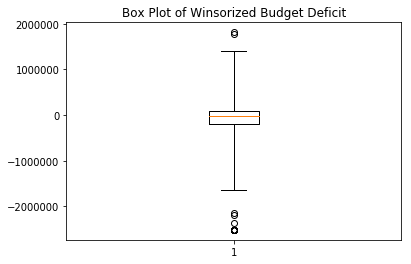

In [18]:
plt.boxplot(budget_deficit_2, whis=5)
plt.title("Box Plot of Winsorized Budget Deficit")

In [19]:
winsorized_budget_2 = winsorize(budget_deficit_2, (0.05,0.05))

Text(0.5,1,'Box Plot of Winsorized Budget Deficit')

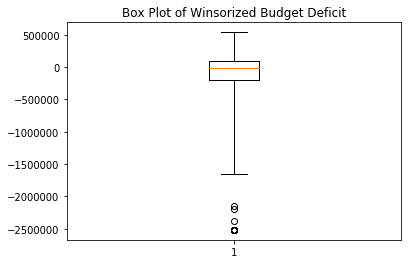

In [20]:
plt.boxplot(winsorized_budget_2, whis=5)
plt.title("Box Plot of Winsorized Budget Deficit")

In [21]:
pd.DataFrame({"original_budget":budget_deficit, "winsorized_budget1":winsorized_budget,
             "winsorized_budget2":winsorized_budget_2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.329761e+04,-61210.328326,-1.736360e+05
std,6.148962e+05,342588.030357,6.502740e+05
min,-5.487742e+06,-921134.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-1.282350e+04,-12823.500000,-1.460050e+04
75%,9.852350e+04,98523.500000,9.184800e+04
max,3.897129e+06,560511.000000,5.400550e+05


Question 5:
There are quite a few differences in the methods, here are a couple. 

The mean: -832976, -612103, -173636
The median: -128235, -128235, -146005

Interesting how the median stayed the same as the original in the first variant.

Question 6:
It appears that the differences in the original to the method used in question three are fewer. The median is exactly the same and the standard deviation is smaller than question four's method. I would use question three's method for analyzation.